In [1]:
using MealModel
using Plots
include("../data/SampleData.jl")

SampleData (generic function with 1 method)

In [2]:
model = MixedMealModel()

MixedMealModel(SciMLBase.ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, SciMLBase.ODEFunction{true, SciMLBase.FullSpecialize, MealModel.var"#3#4"{Float64, Float64, Float64, Float64, Float64, Float64, Float64}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, SciMLSensitivity.ForwardDiffSensitivity{0, nothing}, Tuple{Symbol}, NamedTuple{(:sensealg,), Tuple{SciMLSensitivity.ForwardDiffSensitivity{0, nothing}}}}, SciMLBase.StandardODEProblem}(SciMLBase.ODEFunction{true, SciMLBase.FullSpecialize, MealModel.var"#3#4"{Float64, Float64, Float64, Float64, Float64, Float64, Float64}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Noth

In [3]:
outputs = output(model)

(time = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0], glucose_gut_to_plasma_flux = [0.0, 0.0070739480832374335, 0.01663854426402624, 0.026289465271634102, 0.03539165287304733, 0.04372897709561377, 0.05125360425148053, 0.057992377495012806, 0.06400407953807853, 0.0693601254336926  …  0.003447329864046612, 0.003412886484452697, 0.00337927287479196, 0.003346645083454641, 0.0033150225010880894, 0.0032842878605967656, 0.003254187237142241, 0.0032243300481431957, 0.0031941890532754228, 0.0031631729298277423], hepatic_glucose_flux = [0.043, 0.04298137818899978, 0.04290914499068729, 0.042777482007844383, 0.04258869773446491, 0.04234805385172427, 0.04206198761062497, 0.041737277318177696, 0.04138061081879172, 0.04099837828846806  …  0.04321439285190515, 0.04321244470277279, 0.04321051286413191, 0.04320859751003788, 0.04320669874977446, 0.043204816627853804, 0.043202951124016446, 0.04320110215323138, 0.043199269565695

In [4]:
plot(outputs.time, outputs.plasma_glucose)

In [5]:
using Optimization, OptimizationOptimJL, LineSearches

In [6]:
# load in sample data
glc, ins, trg, nfa, bwg, time = SampleData()

([4.97828626648081 9.83226219754181 … 5.00061029702766 4.9062863745201; 4.44438211792684 8.56497936784908 … 4.68440337786608 5.03050899831009; … ; 4.05422828334834 6.68317282007679 … 3.87347487223252 4.14703615153245; 5.09861020045252 7.19169651136166 … 5.1126128190829 4.95616017748044], [21.7542994608033 287.361969174996 … 23.1679411923448 21.8618244436204; 12.5404266739517 124.050624391434 … 13.4555353291966 14.3638940482423; … ; 19.8623112280412 199.253276210798 … 22.5314861118322 21.0737318920216; 108.76002227887 163.060430670949 … 104.745417655491 97.2648413826163], [1.16871366007653 1.5844017833527 … 1.93219870120156 1.72103932334563; 1.12064493587155 0.988185237587493 … 1.74785291292704 1.5803401544383; … ; 0.911568878711074 0.917659723900865 … 1.25922207558199 0.954325323451108; 1.25060974085694 1.17562009272981 … 1.74007908698886 1.9609698046359], [0.335735045292724 0.306808022891325 … 0.504623299086489 0.561199670138616; 0.497614523572355 0.214246896777152 … 0.576852516292241

In [7]:
# select patient
patient_id = 1 # for this sample data, we can select from patients 1-5

glucose_data = glc[patient_id, :]
insulin_data = ins[patient_id, :]
tg_data = trg[patient_id, :]
nefa_data = nfa[patient_id, :];
body_weight = bwg[patient_id];

In [8]:
# make a model for this specific patient
model = MixedMealModel(
  subject_body_mass = body_weight,
  fasting_glucose = glucose_data[1],
  fasting_insulin = insulin_data[1],
  fasting_TG = tg_data[1],
  fasting_NEFA = nefa_data[1],
  timespan = (0., 720.)
)

MixedMealModel(ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.FullSpecialize, MealModel.var"#3#4"{Float64, Float64, Float64, Float64, Float64, Float64, Float64}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, SciMLSensitivity.ForwardDiffSensitivity{0, nothing}, Tuple{Symbol}, NamedTuple{(:sensealg,), Tuple{SciMLSensitivity.ForwardDiffSensitivity{0, nothing}}}}, SciMLBase.StandardODEProblem}(ODEFunction{true, SciMLBase.FullSpecialize, MealModel.var"#3#4"{Float64, Float64, Float64, Float64, Float64, Float64, Float64}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}(MealModel.var"#3

In [10]:
loss = make_loss(model, glucose_data, time, insulin_data, time, tg_data, time, nefa_data, time)
optimizer = LBFGS(linesearch = BackTracking(order=3))

# select bounds for the latin hypercube sampler
lhc_lb = [0.005, 0, 0, 0, 0, 60., 0.005, 0]
lhc_ub = [0.05, 1., 10., 1., 1., 720., 0.1, 1.]

# create preselected samples
initial_parameters = perform_preselection(model, loss, 100, lhc_lb, lhc_ub)

8×10 Matrix{Float64}:
   0.04595    0.03695    0.04325  …    0.04955    0.04235    0.0212
   0.43       0.65       0.64          0.98       0.27       0.58
   4.2        8.0        8.8           1.9        3.3        6.8
   0.01       0.03       0.04          0.15       0.23       0.11
   0.39       0.83       0.71          0.73       0.95       0.45
 330.6      291.0      456.0      …  238.2      594.6      588.0
   0.0411     0.0354     0.02115       0.0601     0.0886     0.03445
   0.18       0.65       0.17          0.54       0.16       0.26

In [11]:
initial_parameters[:,1]

8-element Vector{Float64}:
   0.045949999954950006
   0.42999999957
   4.1999999958
   0.009999999990000001
   0.38999999961000004
 330.59999974019996
   0.0410999999651
   0.17999999982

In [14]:
# for each initial parameter set we can easily optimize the model

objectives = []
parameters = []

opt_lb = lhc_lb
opt_ub = lhc_ub

for it in axes(initial_parameters, 2)
  try
    optf = OptimizationFunction((x,p) -> loss(x), Optimization.AutoForwardDiff())
    starting_p = initial_parameters[:, it]
    optprob = OptimizationProblem(optf, starting_p, lb=opt_lb, ub=opt_ub)
    sol = Optimization.solve(optprob, optimizer, x_tol=1e-8, f_tol = 1e-6, g_tol=1e-6)
    push!(parameters, sol.u)
    push!(objectives, sol.objective)
    println("Optimization successful! (E = $(sol.objective)) Moving on...")
  catch e 
    throw(e)
    println("Optimization failed... Resampling...")
  end
end

Optimization successful! (E = 5.753003020538251) Moving on...


Optimization successful! (E = 193.4884527951166) Moving on...


Optimization successful! (E = 61.96564672260142) Moving on...


Optimization successful! (E = 5.753016726993612) Moving on...


Optimization successful! (E = 5.7530059043312205) Moving on...


Optimization successful! (E = 5.753083820656494) Moving on...


Optimization successful! (E = 5.753027712375176) Moving on...


Optimization successful! (E = 5.753000318218078) Moving on...


Optimization successful! (E = 5.753001182065454) Moving on...


Optimization successful! (E = 5.753292376340027) Moving on...


In [16]:
# combine the found parameters with the full model parameters, here we selected the first result out of the 10.
pars = create_full_parameter_vector(model, parameters[1]);

# calculate the model outputs
found_outputs = output(model, pars);

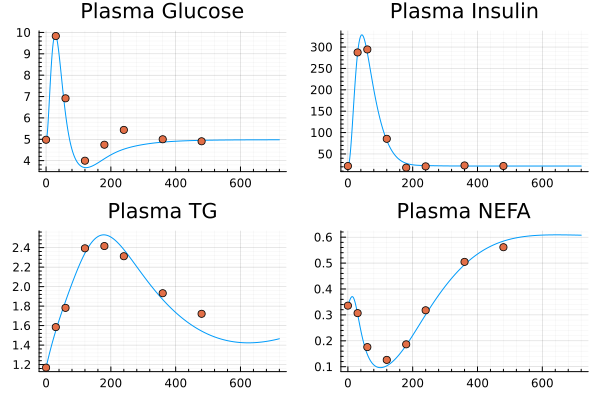

In [24]:
# plot the model fit
glucose_plot = plot(found_outputs.time, found_outputs.plasma_glucose, title="Plasma Glucose")
scatter!(glucose_plot, time, glucose_data)

insulin_plot = plot(found_outputs.time, found_outputs.plasma_insulin, title="Plasma Insulin")
scatter!(insulin_plot, time, insulin_data)

tg_plot = plot(found_outputs.time, found_outputs.plasma_TG, title="Plasma TG")
scatter!(tg_plot, time, tg_data)

nefa_plot = plot(found_outputs.time, found_outputs.plasma_NEFA, title="Plasma NEFA")
scatter!(nefa_plot, time, nefa_data)

plot(glucose_plot, insulin_plot, tg_plot, nefa_plot, legend=false, minorgrid=0.05, grid=0.2)
